In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits

In [2]:
fits_file = fits.open("/home/andresgo/Documents/Solar Astrophysics/Homework 2/hinode_2020-09-30.fits")
fits_file.info()

Filename: /home/andresgo/Documents/Solar Astrophysics/Homework 2/hinode_2020-09-30.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (112, 4, 384, 384)   int16   


In [3]:
fits_file[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                   16 /bits per data value                             
NAXIS   =                    4 / number of axes                                 
NAXIS1  =                  112 /                                                
NAXIS2  =                    4                                                  
NAXIS3  =                  384                                                  
NAXIS4  =                  384                                                  
EXTEND  =                    T /file may contain extensions                     
DATE    = '2020-10-06T18:10:00.000' /                                           
DATE_RF0= '2020-10-06T18:10:00.000' /                                           
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
MDP_CLK =           32679810

In [4]:
spectra = fits_file[0].data 
print(spectra.shape)
spectra = spectra[:,:,0,:]

(384, 384, 4, 112)


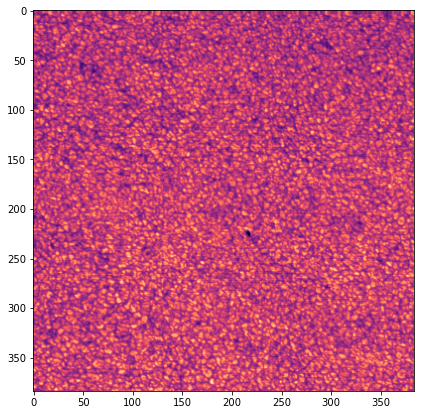

In [5]:
plt.figure(figsize=[10,7])
plt.imshow(spectra[:,:,0],cmap='magma')

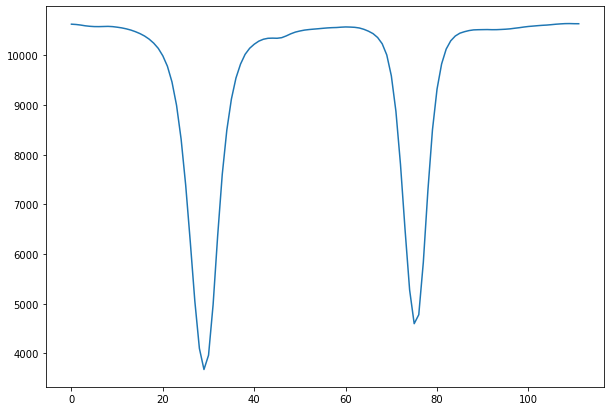

In [6]:
mean = np.mean(spectra,axis=(0,1))
plt.figure(figsize=[10,7])
plt.plot(mean)

In [7]:
from scipy.signal import argrelextrema
mins = argrelextrema(mean,np.less)
print(mins)

(array([ 6, 29, 45, 75, 92]),)


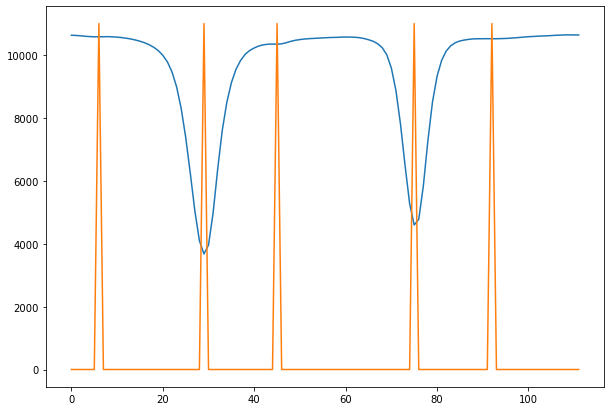

In [8]:
plt.figure(figsize=[10,7])
minima = np.zeros(112)
minima[mins] = 11000.0
plt.plot(mean)
plt.plot(minima)

In [9]:
n1 = 29.0
n2 = 75.0
l1 = 6301.5008
l2 = 6302.4932
slope = (l2-l1)/(n2-n1)
intercept = l1 - n1*slope
print (slope, intercept)

0.021573913043480192 6300.875156521739


In [10]:
ll = np.linspace(0,111,112)
ll = ll[:] * slope + intercept

In [11]:
atlas = np.loadtxt("/home/andresgo/Documents/Solar Astrophysics/Homework 2/6301_5_atlas.txt",unpack=True)
print (atlas.shape)

(2, 2001)


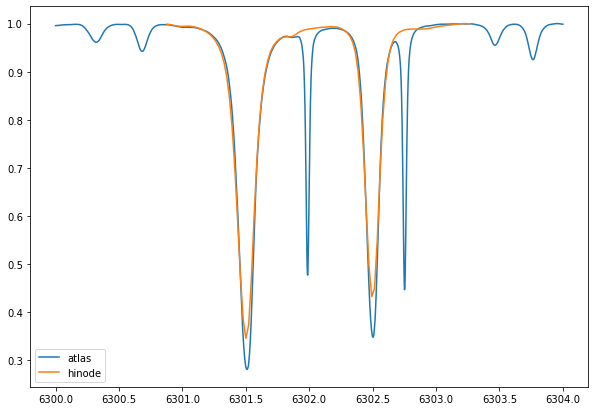

In [18]:
plt.figure(figsize=[10,7])
plt.plot(atlas[0],atlas[1]/np.amax(atlas[1]),label='atlas')
plt.plot(ll,mean/np.amax(mean),label='hinode')
plt.legend()
plt.savefig('Problem3_a.png',dpi=300)

In [13]:
NX = spectra.shape[0]
NY = spectra.shape[1]
v_1 = np.zeros([NX,NY])
v_2 = np.zeros([NX,NY])

In [14]:
def calculate_velocity_pr0 (spectrum,ll,left,right,center_wvl):
    # Fit the intensity shape with second order polynomial:
    p = np.polyfit(ll[left:right],spectrum[left:right],2)
    ll_min = -p[1]/2./p[0]
    delta_lambda = ll_min - center_wvl
    v =delta_lambda/center_wvl * 2.997E5
    return v

In [15]:
for i in range(0,NX):
    for j in range(0,NY):
        v_1[i,j] = calculate_velocity_pr0(spectra[i,j],ll,26,32,l1)
        v_2[i,j] = calculate_velocity_pr0(spectra[i,j],ll,72,78,l2)

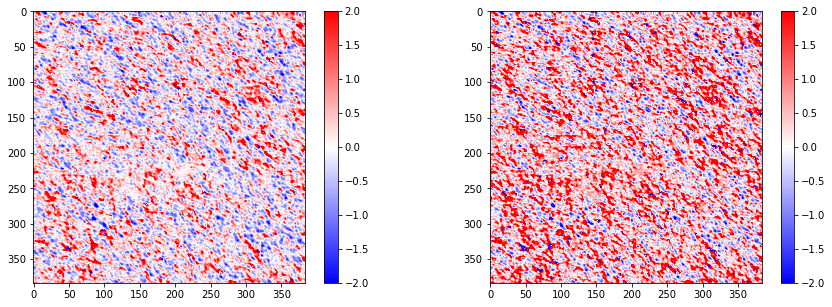

In [16]:
plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
plt.subplot(121)
plt.imshow(v_1[:,:],cmap='bwr',vmin=-2,vmax=2)
plt.colorbar()
plt.subplot(122)
plt.imshow(v_2[:,:],cmap='bwr',vmin=-2,vmax=2)
plt.colorbar()

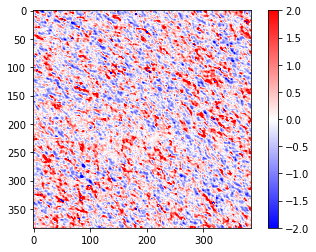

In [24]:
plt.imshow(v_1[:,:],cmap='bwr',vmin=-2,vmax=2)
plt.colorbar()
plt.savefig('Problem3_c.png',dpi=300)

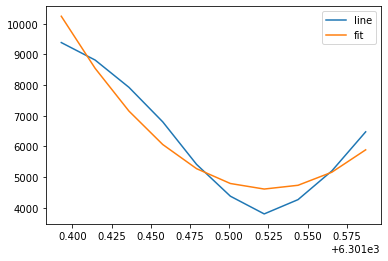

In [19]:
x_pixcel=192
y_pixcel=192
p = np.polyfit(ll[24:34],spectra[x_pixcel,y_pixcel,24:34],2)
plt.figure()
plt.plot(ll[24:34],spectra[x_pixcel,y_pixcel,24:34],label='line')
y = p[0] * ll[24:34]**2.0 + p[1] * ll[24:34] + p[2]
plt.plot(ll[24:34],y,label='fit')
plt.legend()
plt.savefig('Problem3_b.png',dpi=300)